<a href="https://colab.research.google.com/github/ishandahal/stats453-deep_learning_torch/blob/main/perceptron_adaline_linear_regression/Linear_Regression_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Linear Regression with Gradient Descent

In [ ]:
pip install watermark

In [ ]:
%load_ext watermark
%watermark -a 'Ishan Dahal' -v -p torch,pandas,matplotlib

Ishan Dahal 

CPython 3.6.9
IPython 5.5.0

torch 1.7.0+cu101
pandas 1.1.5
matplotlib 3.2.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

#### Load and Prepare a Toy Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/stat453-deep-learning-ss20/master/L05-grad-descent/code/datasets/linreg-data.csv', index_col=0)
df.tail()

,x1,x2,y
995,-0.942094,-0.835856,-22.324428
996,1.222445,-0.403177,-52.121493
997,-0.112466,-1.688230,-57.043196
998,-0.403459,-0.412272,-27.701833
999,0.021351,-0.499017,-9.804714


In [ ]:
# Assign features and target

X = torch.tensor(df[['x1', 'x2']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.float)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

#### Implementing Linear Regression

In [ ]:
class LinearRegression1():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros((num_features, 1),
                                    dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)

    def forward(self, x):
        netinputs = torch.add(torch.matmul(x, self.weights), self.bias)
        activations = netinputs
        return activations.view(-1)

    def backward(self, x, yhat, y):

        grad_loss_yhat = 2*(yhat - y)

        grad_yhat_weights = x
        grad_yhat_bias = 1

        ## Chain rule: inner times outer

        grad_loss_weights = torch.matmul(grad_yhat_weights.t(), grad_loss_yhat.view(-1, 1)) / y.size(0)
        grad_loss_bias = torch.sum(grad_loss_yhat * grad_yhat_bias) / y.size(0)

        ## return negative gradients
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias
    

In [ ]:
def loss(yhat, y):
    return torch.mean((yhat - y)**2)

def train(model, x, y, num_epochs, learning_rate=0.01):
    cost = []

    for e in range(num_epochs):

        ## Compute outputs
        yhat = model.forward(x)

        ## Compute gradients
        negative_grad_w, negative_grad_b = model.backward(x, yhat, y)

        ### Update weights
        model.weights += learning_rate * negative_grad_w
        model.bias += learning_rate * negative_grad_b

        ## Logging 
        yhat = model.forward(x)

        curr_loss = loss(yhat, y)
        print(f"Epoch: {e+1:03d}", end='')
        print(f"    | MSE: {curr_loss:.5f}")
        cost.append(curr_loss)
    
    return cost

#### Train Linear Regression Model

In [ ]:
model = LinearRegression1(num_features=X_train.size(1))
cost = train(model, X_train, y_train,
             num_epochs=100,
             learning_rate=0.05)

Epoch: 001    | MSE: 1532.67603
Epoch: 002    | MSE: 1312.39868
Epoch: 003    | MSE: 1133.91809
Epoch: 004    | MSE: 989.30286
Epoch: 005    | MSE: 872.12592
Epoch: 006    | MSE: 777.18097
Epoch: 007    | MSE: 700.24915
Epoch: 008    | MSE: 637.91241
Epoch: 009    | MSE: 587.40167
Epoch: 010    | MSE: 546.47284
Epoch: 011    | MSE: 513.30811
Epoch: 012    | MSE: 486.43430
Epoch: 013    | MSE: 464.65799
Epoch: 014    | MSE: 447.01224
Epoch: 015    | MSE: 432.71332
Epoch: 016    | MSE: 421.12634
Epoch: 017    | MSE: 411.73697
Epoch: 018    | MSE: 404.12827
Epoch: 019    | MSE: 397.96249
Epoch: 020    | MSE: 392.96603
Epoch: 021    | MSE: 388.91708
Epoch: 022    | MSE: 385.63583
Epoch: 023    | MSE: 382.97684
Epoch: 024    | MSE: 380.82202
Epoch: 025    | MSE: 379.07571
Epoch: 026    | MSE: 377.66052
Epoch: 027    | MSE: 376.51367
Epoch: 028    | MSE: 375.58420
Epoch: 029    | MSE: 374.83102
Epoch: 030    | MSE: 374.22055
Epoch: 031    | MSE: 373.72586
Epoch: 032    | MSE: 373.32489
Epoch

#### Evaluate Linear Regression Model
##### Plot MSE

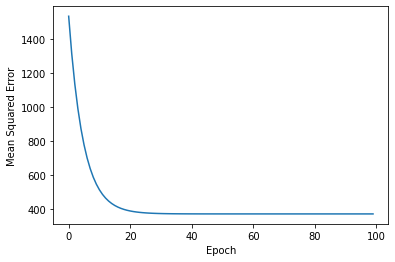

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel("Epoch")
plt.show()

In [ ]:
train_pred = model.forward(X_train)
test_pred = model.forward(X_test)

print(f'Train MSE: {loss(train_pred, y_train):.5f}')
print(f"Test MSE: {loss(test_pred, y_test):.5f}")

Train MSE: 371.61035
Test MSE: 406.88412


#### Compare with analytical solution

In [ ]:
print('Weights', model.weights)
print('Bias', model.bias)

Weights tensor([[ 0.3623],
        [37.8790]])
Bias tensor([-0.5464])


In [ ]:
def analytical_solution(x, y):
    Xb = torch.cat( (torch.ones((x.size(0), 1)), x), dim=1)
    w = torch.zeros(x.size(1))
    z = torch.inverse(torch.matmul(Xb.t(), Xb))
    params = torch.matmul(z, torch.matmul(Xb.t(), y))
    b, w = torch.tensor([params[0]]), params[1:].view(x.size(1), 1)
    return w, b

w, b = analytical_solution(X_train, y_train)
print('Analytical weights', w)
print('Analytical bias', b)

Analytical weights tensor([[ 0.3624],
        [37.8801]])
Analytical bias tensor([-0.5464])


In [ ]:
def train_shuffle(model, x, y, num_epochs, learning_rate=0.01):
    cost = []

    for e in range(num_epochs):

        ## Compute outputs
        shuffled_idx = torch.randperm(len(x))
        x, y = x[shuffled_idx], y[shuffled_idx]
        yhat = model.forward(x)

        ## Compute gradients
        negative_grad_w, negative_grad_b = model.backward(x, yhat, y)

        ### Update weights
        model.weights += learning_rate * negative_grad_w
        model.bias += learning_rate * negative_grad_b

        ## Logging 
        yhat = model.forward(x)

        curr_loss = loss(yhat, y)
        print(f"Epoch: {e+1:03d}", end='')
        print(f"    | MSE: {curr_loss:.5f}")
        cost.append(curr_loss)
    
    return cost

model = LinearRegression1(X_train.size(1))
cost = train_shuffle(model, X_train, y_train,
              num_epochs=200, learning_rate=0.01)

Epoch: 001    | MSE: 1747.88184
Epoch: 002    | MSE: 1693.46338
Epoch: 003    | MSE: 1641.19714
Epoch: 004    | MSE: 1590.99756
Epoch: 005    | MSE: 1542.78357
Epoch: 006    | MSE: 1496.47583
Epoch: 007    | MSE: 1451.99963
Epoch: 008    | MSE: 1409.28210
Epoch: 009    | MSE: 1368.25403
Epoch: 010    | MSE: 1328.84827
Epoch: 011    | MSE: 1291.00073
Epoch: 012    | MSE: 1254.64990
Epoch: 013    | MSE: 1219.73657
Epoch: 014    | MSE: 1186.20398
Epoch: 015    | MSE: 1153.99719
Epoch: 016    | MSE: 1123.06409
Epoch: 017    | MSE: 1093.35425
Epoch: 018    | MSE: 1064.81909
Epoch: 019    | MSE: 1037.41235
Epoch: 020    | MSE: 1011.08929
Epoch: 021    | MSE: 985.80713
Epoch: 022    | MSE: 961.52466
Epoch: 023    | MSE: 938.20239
Epoch: 024    | MSE: 915.80225
Epoch: 025    | MSE: 894.28796
Epoch: 026    | MSE: 873.62421
Epoch: 027    | MSE: 853.77753
Epoch: 028    | MSE: 834.71564
Epoch: 029    | MSE: 816.40735
Epoch: 030    | MSE: 798.82324
Epoch: 031    | MSE: 781.93408
Epoch: 032    | MSE

Text(0, 0.5, 'MSE')

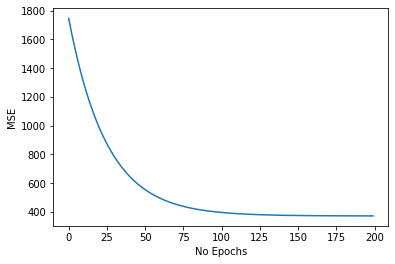

In [ ]:
plt.plot(range(len(cost)), cost)
plt.xlabel('No Epochs')
plt.ylabel('MSE')

In [ ]:
train_pred = model.forward(X_train)
test_pred = model.forward(X_test)

print(f'Train MSE: {loss(train_pred, y_train):.5f}')
print(f"Test MSE: {loss(test_pred, y_test):.5f}")

Train MSE: 372.06152
Test MSE: 408.32800


### Second Order Derivative

In [ ]:
from torch.autograd import grad

In [ ]:
x = torch.tensor([3.], requires_grad=True)
y = torch.tensor([4.])

f = x**2 * y + y

grad(f, x) # 2xy = 24

(tensor([24.]),)

In [ ]:
## Second Order Derivative

x = torch.tensor([3.], requires_grad=True)
y = torch.tensor([4.])

f = x**2 * y + y

df_dx = grad(f, x, create_graph=True) # first order derivative
grad(df_dx, x) # 2y = 8

(tensor([8.]),)